In [1]:
from helper import *
import warnings
warnings.filterwarnings('ignore')

import pandas as pd

In [2]:
fo = pd.ExcelFile('cleaned2015.xls') 
# clean-data.xlsx
df = pd.read_excel(fo, 'Sheet1')
print(df)

                                                   text
0     kajian virtual private network vpn sistem peng...
1     analisis qos quality service jaringan kampus m...
2     model average fts markov chain peramalan pengg...
3     pengembangan media e modul mata pelajaran prod...
4     perangkat pendukung forensik lalu lintas jaringan
5     analisa implementasi jaringan internet menggab...
6     analisa quality service qos jaringan internet ...
7     keamanan jaringan komputer metode blocking por...
8     analisa pemanfaatan proxy server media filteri...
9     intrusion detection system ids metode deteksi ...
10    pengaruh promosi online persepsi harga keputus...
11    rancang bangun jaringan komunikasi voip server...
12                belajar jaringan komputer mikrotik os
13    sistem penjualan web e commerce tata distro ka...
14    perancangan jaringan komputer aplikasi vhp onl...
15    rancang bangun jaringan hotspot kampus niversi...
16    perancangan implementasi jaringan komputer

In [3]:
#drop empty line
df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

text = df['text']
text_list =  [i.split() for i in text]
print(len(text_list))
print(text_list[:1])

9076
[['kajian', 'virtual', 'private', 'network', 'vpn', 'sistem', 'pengamanan', 'data', 'jaringan', 'komputer', 'studi', 'kasus', 'jaringan', 'komputer', 'unikom']]


In [4]:
#Create Biagram & Trigram Models 
from gensim.models import Phrases
# Add bigrams and trigrams to docs, minimum count 5 means only that appear 5 times or more.
bigram = Phrases(text_list, min_count=5)
trigram = Phrases(bigram[text_list], min_count=5)

for idx in range(len(text_list)):
    for token in bigram[text_list[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            text_list[idx].append(token)
    for token in trigram[text_list[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            text_list[idx].append(token)
            
print(text_list)

[['kajian', 'virtual', 'private', 'network', 'vpn', 'sistem', 'pengamanan', 'data', 'jaringan', 'komputer', 'studi', 'kasus', 'jaringan', 'komputer', 'unikom', 'virtual_private', 'network_vpn', 'jaringan_komputer', 'studi_kasus', 'jaringan_komputer', 'virtual_private', 'network_vpn', 'jaringan_komputer', 'studi_kasus', 'jaringan_komputer', 'virtual_private_network_vpn', 'jaringan_komputer', 'studi_kasus', 'jaringan_komputer'], ['analisis', 'qos', 'quality', 'service', 'jaringan', 'kampus', 'microtic', 'routerboard', 'quality_service', 'quality_service', 'quality_service'], ['model', 'average', 'fts', 'markov', 'chain', 'peramalan', 'penggunaan', 'bandwidth', 'jaringan', 'komputer', 'bandwidth_jaringan', 'bandwidth_jaringan', 'bandwidth_jaringan'], ['pengembangan', 'media', 'e', 'modul', 'mata', 'pelajaran', 'produktif', 'pokok', 'bahasan', 'instalasi', 'jaringan', 'lan', 'local', 'area', 'network', 'siswa', 'kelas', 'xi', 'jurusan', 'teknik', 'pengembangan_media', 'mata_pelajaran', 'po

In [5]:
phrasedf = pd.DataFrame(text_list)
print(phrasedf)

                  0             1              2             3   \
0             kajian       virtual        private       network   
1           analisis           qos        quality       service   
2              model       average            fts        markov   
3       pengembangan         media              e         modul   
4          perangkat     pendukung       forensik          lalu   
5            analisa  implementasi       jaringan      internet   
6            analisa       quality        service           qos   
7           keamanan      jaringan       komputer        metode   
8            analisa   pemanfaatan          proxy        server   
9          intrusion     detection         system           ids   
10          pengaruh       promosi         online      persepsi   
11           rancang        bangun       jaringan    komunikasi   
12           belajar      jaringan       komputer      mikrotik   
13            sistem     penjualan            web             

In [6]:
from gensim import corpora, models
# Create a dictionary representation of the documents.
dictionary = corpora.Dictionary(text_list)
dictionary.filter_extremes(no_below=1, no_above=0.5)
print(dictionary)

Dictionary(11680 unique tokens: ['data', 'jaringan', 'jaringan_komputer', 'kajian', 'kasus']...)


In [7]:
#build bag of words (corpus)
bow = [dictionary.doc2bow(doc) for doc in text_list]

print(len(bow))
# print(doc_term_matrix[100])

# calculate TF-IDF
tfidf = models.TfidfModel(bow)
corpus_tfidf = tfidf[bow]
# similarity = pd.DataFrame(corpus_tfidf, columns=['Topic']).to_csv("similarity.csv")

# print(corpus_tfidf)

# feature_names = tfidf.get_feature_names()
# corpus_index = [n for n in corpus_tfidf]

# showme = pd.DataFrame(tfs.T.todense(), index=feature_names, columns=corpus_index)
# print(showme)

# for i in corpus_tfidf:
#     result = pd.DataFrame()
#     result = result.append(pd.Series(corpus_tfidf), ignore_index=True)
#     print(result)

9076


In [8]:
import numpy as np
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
from numpy import array
#function to compute coherence values
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    coherence_values = []
    np.random.seed(9)
    model_list = []
    num_topics = []
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, iterations=100)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
        
    return model_list, coherence_values

# num_topics

In [9]:
start=2
limit=20
step=2
model_list, coherence_values = compute_coherence_values(dictionary, corpus=corpus_tfidf, 
                                                        texts=text_list, start=start, limit=limit, step=step)

In [10]:
#show graphs
import matplotlib.pyplot as plt
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

<Figure size 640x480 with 1 Axes>

In [11]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 10))

Num Topics = 2  has Coherence Value of 0.2362046628
Num Topics = 4  has Coherence Value of 0.3354984404
Num Topics = 6  has Coherence Value of 0.370314643
Num Topics = 8  has Coherence Value of 0.4090815992
Num Topics = 10  has Coherence Value of 0.4519154385
Num Topics = 12  has Coherence Value of 0.4761537386
Num Topics = 14  has Coherence Value of 0.5173170602
Num Topics = 16  has Coherence Value of 0.4655989107
Num Topics = 18  has Coherence Value of 0.4876570958


In [12]:
from pprint import pprint

model = LdaModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=14)
pprint(model.print_topics())

[(0,
  '0.018*"informasi_penjualan" + 0.016*"studi_kasus" + 0.012*"penjualan" + '
  '0.010*"informasi_akademik" + 0.010*"informasi" + 0.010*"sistem_informasi" + '
  '0.009*"sekolah_menengah" + 0.007*"tugas_akhir" + 0.007*"web" + '
  '0.006*"siswa_smk"'),
 (1,
  '0.012*"studi_kasus" + 0.010*"e_learning" + 0.009*"rancang_bangun" + '
  '0.008*"kota_semarang" + 0.007*"operasi" + 0.007*"informasi" + '
  '0.006*"sistem_informasi" + 0.006*"perguruan_tinggi" + '
  '0.006*"sistem_operasi" + 0.006*"informasi_manajemen"'),
 (2,
  '0.006*"siswa_sma" + 0.005*"c" + 0.005*"client_server" + 0.005*"studi_kasus" '
  '+ 0.005*"fuzzy_c" + 0.005*"matematika_smp" + 0.005*"pengukuran_kinerja" + '
  '0.004*"informasi" + 0.004*"server" + 0.004*"sistem_informasi"'),
 (3,
  '0.015*"sistem_pendukung" + 0.014*"smp_negeri" + 0.012*"metode_certainty" + '
  '0.011*"sistem_pakar" + 0.008*"keputusan_penerimaan" + 0.008*"studi_kasus" + '
  '0.007*"mendiagnosa_penyakit" + 0.007*"ahp" + 0.006*"penerima_beasiswa" + '
  '0.

In [13]:
model = LdaModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=14)

for idx, topic in model.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.015*"sms_gateway" + 0.013*"siswa_kelas" + 0.011*"hasil_belajar" + 0.011*"augmented_reality" + 0.007*"studi_kasus" + 0.007*"model_pembelajaran" + 0.007*"informasi_akademik" + 0.007*"keputusan_penerimaan" + 0.006*"rancang_bangun" + 0.006*"belajar"
Topic: 1 Word: 0.022*"informasi_penjualan" + 0.012*"informasi_administrasi" + 0.011*"pengolahan_data" + 0.010*"penjualan" + 0.009*"sistem_informasi" + 0.008*"informasi" + 0.007*"sma_negeri" + 0.006*"administrasi" + 0.006*"studi_kasus" + 0.006*"soal"
Topic: 2 Word: 0.011*"studi_kasus" + 0.010*"sistem_pendukung" + 0.008*"program_studi" + 0.007*"pendukung_keputusan" + 0.007*"pengambilan_keputusan" + 0.006*"pelayanan" + 0.006*"pengelolaan_data" + 0.006*"keputusan" + 0.006*"smk_negeri" + 0.005*"pendukung"
Topic: 3 Word: 0.018*"pengembangan_media" + 0.015*"informasi_geografis" + 0.013*"kota_semarang" + 0.008*"geografis" + 0.006*"informasi" + 0.006*"sistem_informasi" + 0.005*"bahasa_indonesia" + 0.005*"pengembangan" + 0.005*"android" 

# Dominant topic and its percentage contribution in each document

In [14]:
def format_topics_sentences(ldamodel=None, corpus=bow, texts=text):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        # check notes 28/9
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(model, corpus=bow, texts=text_list)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['No_Dokumen', 'Topik_Dominan', 'Persentase_Kontribusi', 'Kata_Kunci', 'Teks']
df_dominant_topic.head(247)

,No_Dokumen,Topik_Dominan,Persentase_Kontribusi,Kata_Kunci,Teks
0,0,13.0,0.3673,"sekolah_menengah, metode_certainty, sistem_pak...","[kajian, virtual, private, network, vpn, siste..."
1,1,5.0,0.3495,"jawa_tengah, anak_usia, pembelian, aplikasi, k...","[analisis, qos, quality, service, jaringan, ka..."
2,2,2.0,0.3917,"studi_kasus, sistem_pendukung, program_studi, ...","[model, average, fts, markov, chain, peramalan..."
3,3,9.0,0.5761,"mata_pelajaran, media_pembelajaran, mata_kulia...","[pengembangan, media, e, modul, mata, pelajara..."
4,4,8.0,0.6781,"rekayasa_perangkat, smp_negeri, rancang_bangun...","[perangkat, pendukung, forensik, lalu, lintas,..."
5,5,9.0,0.5165,"mata_pelajaran, media_pembelajaran, mata_kulia...","[analisa, implementasi, jaringan, internet, me..."
6,6,13.0,0.6728,"sekolah_menengah, metode_certainty, sistem_pak...","[analisa, quality, service, qos, jaringan, int..."
7,7,5.0,0.5314,"jawa_tengah, anak_usia, pembelian, aplikasi, k...","[keamanan, jaringan, komputer, metode, blockin..."
8,8,8.0,0.3918,"rekayasa_perangkat, smp_negeri, rancang_bangun...","[analisa, pemanfaatan, proxy, server, media, f..."
9,9,2.0,0.3509,"studi_kasus, sistem_pendukung, program_studi, ...","[intrusion, detection, system, ids, metode, de..."


In [15]:
# Generate dataframe from list and write to xlsx.
pd.DataFrame(df_dominant_topic, columns=['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']).to_excel('topics.xls', header=True, index=False)

In [16]:
count_topics = df_dominant_topic['Topik_Dominan'].value_counts()
count_topics

10.0    879
11.0    804
7.0     763
4.0     731
13.0    723
0.0     671
6.0     662
9.0     651
2.0     644
5.0     614
8.0     506
1.0     504
3.0     462
12.0    462
Name: Topik_Dominan, dtype: int64

In [17]:
# matplotlib inline

Text(0.5,1,'Persebaran Banyak Judul Penelitian Berdasarkan Topik')

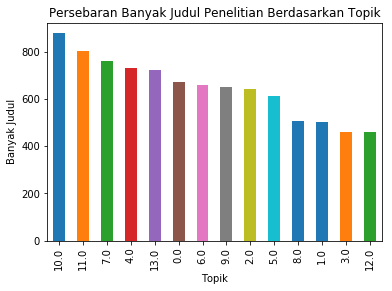

In [18]:
count_topics.plot.bar()

plt.xlabel('Topik')
plt.ylabel('Banyak Judul')
plt.title('Persebaran Banyak Judul Penelitian Berdasarkan Topik')

# The most representative sentence for each topic

In [19]:
# Display setting to show more characters in column
# Mallet
pd.options.display.max_colwidth = 100

sent_topics_sorteddf = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf = pd.concat([sent_topics_sorteddf, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf.head(20)

,Topic_Num,Topic_Perc_Contrib,Keywords,Representative Text
0,0.0,0.9613,"sms_gateway, siswa_kelas, hasil_belajar, augmented_reality, studi_kasus, model_pembelajaran, inf...","[perancangan, sistem, pakar, mendeteksi, kerusakan, mesin, mobil, toyota, avanza, rush, studi, k..."
1,1.0,0.9629,"informasi_penjualan, informasi_administrasi, pengolahan_data, penjualan, sistem_informasi, infor...","[electrocardiogram, kota, ecil, uran, mm, x, mm, mewa, ili, wa, tu, deti, x, deti, ota, besar, u..."
2,2.0,0.9690,"studi_kasus, sistem_pendukung, program_studi, pendukung_keputusan, pengambilan_keputusan, pelaya...","[sistem, pendukung, keputusan, pemilihan, program, studi, fuzzy, inference, system, metode, mamd..."
3,3.0,0.9629,"pengembangan_media, informasi_geografis, kota_semarang, geografis, informasi, sistem_informasi, ...","[sistem, informasi, peramalan, beban, listrik, jangka, panjang, kabupaten, jember, jst, backprop..."
4,4.0,0.9656,"sistem_pendukung, metode_simple, keputusan_pemilihan, studi_kasus, sma_negeri, pendukung, siswa_...","[sistem, pendukung, keputusan, pemilihan, siswa, berprestasi, metode, profile, matching, sma, ne..."
5,5.0,0.9690,"jawa_tengah, anak_usia, pembelian, aplikasi, keputusan_pembelian, management_system, objek_wisat...","[perancangan, sistem, informasi, manajemen, rumah, sakit, web, studi, kasus, rumah, sakit, tni, ..."
6,6.0,0.9613,"metode_topsis, e_commerce, rancang_bangun, sistem_operasi, studi_kasus, knowledge_management, op...","[sistem, informasi, penjualan, pengendalian, persediaan, barang, metode, economic, order, quanti..."
7,7.0,0.9613,"rancang_bangun, informasi_manajemen, analisa_perancangan, media_pembelajaran, manajemen, linier,...","[rancang, bangun, sistem, pakar, prediksi, stres, belajar, neural, network, algoritma, backpropa..."
8,8.0,0.9680,"rekayasa_perangkat, smp_negeri, rancang_bangun, operasi_android, basis_data, raspberry_pi, metod...","[aplikasi, rekam, medis, pasien, rawat, jalan, rawat, inap, rumah, sakit, ibu, anak, tiara, fatr..."
9,9.0,0.9558,"mata_pelajaran, media_pembelajaran, mata_kuliah, tugas_akhir, teknik_informatika, simple_additiv...","[intrusion, detection, prevention, system, idps, local, area, network, lan, intrusion_detection,..."


In [20]:
import gensim
import pyLDAvis.gensim;pyLDAvis.enable_notebook()

data = pyLDAvis.gensim.prepare(model, corpus_tfidf, dictionary)
print(data)
pyLDAvis.save_html(data, 'lda-gensim-2015.html')

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
10     0.020116 -0.140882       1        1  8.308313
11    -0.089102 -0.068862       2        1  8.084568
4     -0.139301  0.018598       3        1  7.692437
9      0.074436 -0.075234       4        1  7.663571
13    -0.022763 -0.090543       5        1  7.577465
0      0.115867 -0.009218       6        1  7.287599
2     -0.095074  0.011189       7        1  7.261436
7      0.043447  0.007533       8        1  7.218808
6     -0.014262  0.069541       9        1  7.153171
5      0.024364  0.046780      10        1  6.977496
8      0.009571  0.021968      11        1  6.490484
12     0.058638  0.053530      12        1  6.240883
1      0.014134  0.080734      13        1  6.183413
3     -0.000072  0.074866      14        1  5.860363, topic_info=     Category        Freq                                  Term       Total  \
term                          

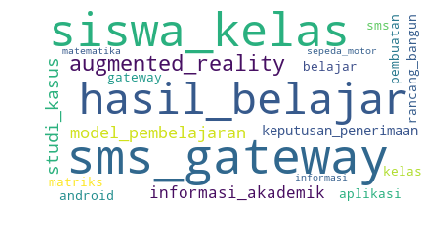

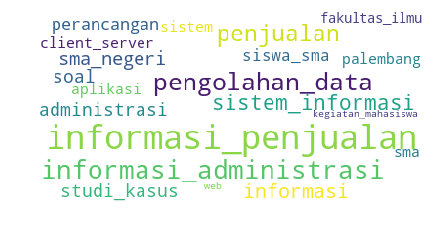

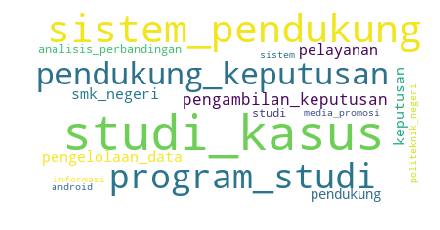

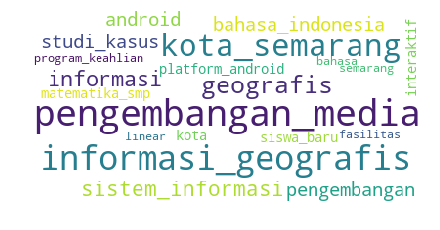

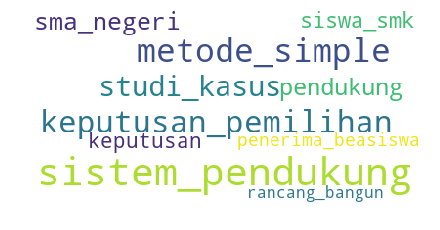

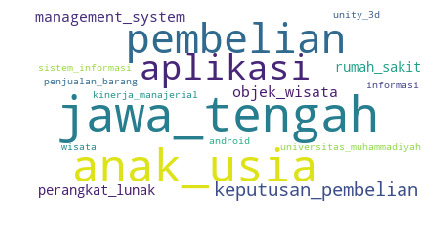

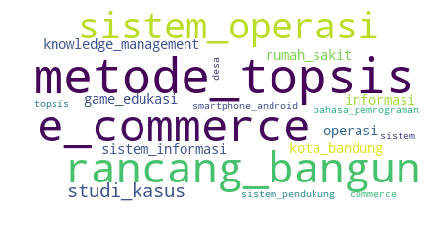

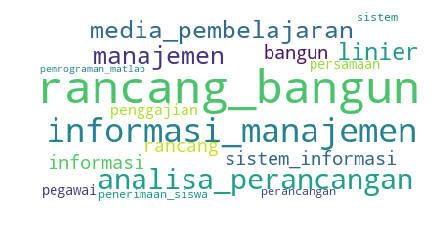

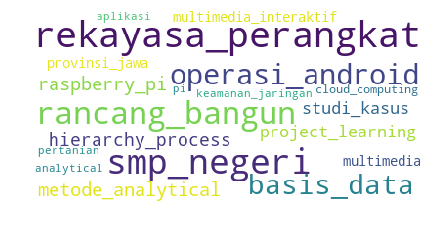

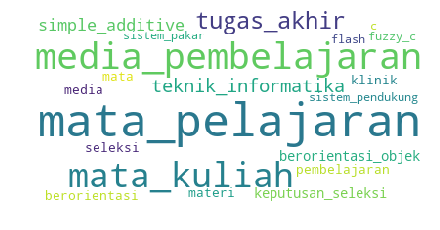

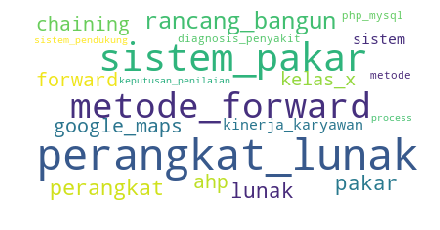

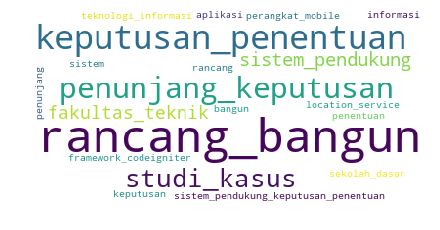

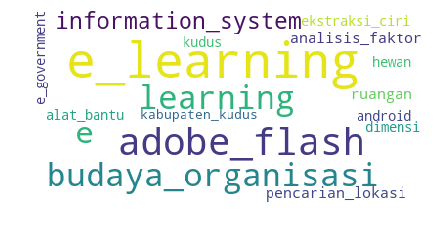

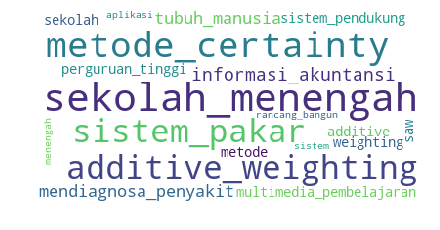

In [21]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud as wd

# # lower max_font_size, change the maximum number of word and lighten the background:
# wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
# plt.figure()
# plt.imshow(wordcloud, interpolation="bilinear")
# plt.axis("off")
# plt.show()

for t in range(model.num_topics):
    plt.figure(figsize=(7,6))
    plt.imshow(wd(max_font_size=50, max_words=20, background_color="white", min_font_size=10).fit_words(dict(model.show_topic(t,200))))
    plt.axis("off")
#     plt.title("Topic #" + str(t))
#     plt.savefig("wcld-topic-"+str(t)+".png", facecolor='k')
#     plt.tight_layout(pad=0)
    plt.savefig("wcld-topic-"+str(t)+".png", facecolor='none', bbox_inches='tight')
    
# plt.show()

In [22]:
import pickle
filename = 'model2015.pkl'
pickle.dump(model, open(filename, 'wb'))
model.save('lda.model')